In [1]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from relearn.model import *
from relearn.cora_eval import *

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_geometric/typing.py:128: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_scatter/_scatter_cpu.so, 0x0006): Symbol not found: __ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_NSt3__18optionalINS6_17basic_string_viewIcNS6_11char_traitsIcEEEEEE
  Referenced from: <2BF76774-0954-3F15-B7FE-8A5E5111D7DF> /Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_scatter/_scatter_cpu.so
  Expected in:     <A51C8C05-245A-3989-8D3C-9A6704422CA5> /Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch/lib/libtorch_cpu.dylib
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_geometric/typing.py:166: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: dlopen(/

In [4]:
# Parameters
hidden_dim = 128
z_dim = 32
num_mixtures = 5
num_epochs = 500
subset_size = 2708  # Use a subset of nodes for faster testing

# Define architecture configurations
gcn_hidden_dims = [64, 64, 128]        # GCN encoder layers
edge_mlp_hidden_dims = [128, 64, 64]   # Edge encoder MLP layers
decoder_hidden_dims = [128, 64, 32]     # Decoder MLP layers
dropout = 0.1                      # Dropout rate

### Cora dataset

In [7]:
# Load and prepare dataset
print("Loading Cora dataset...")
full_graph, full_latent_positions, labels = load_cora_dataset()
print(f"Full Cora graph: {full_graph.number_of_nodes()} nodes, {full_graph.number_of_edges()} edges")
    
# Get a subset for faster testing
print(f"Creating subset with {subset_size} nodes...")
graph, latent_positions, sub_labels = get_subset_graph(full_graph, full_latent_positions, labels, num_nodes=subset_size)
print(f"Subset graph: {graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges")
    
# Basic graph statistics
print("\nGraph Statistics:")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print(f"Average degree: {2 * graph.number_of_edges() / graph.number_of_nodes():.2f}")
print(f"Node feature dimension: {latent_positions.shape[1]}")

Loading Cora dataset...
Full Cora graph: 2708 nodes, 5278 edges
Creating subset with 2708 nodes...
Subset graph: 2708 nodes, 5278 edges

Graph Statistics:
Number of nodes: 2708
Number of edges: 5278
Average degree: 3.90
Node feature dimension: 1433



Initializing ReLearn model...

Running ReLearn pipeline with KL annealing...
Visualizing original graph...


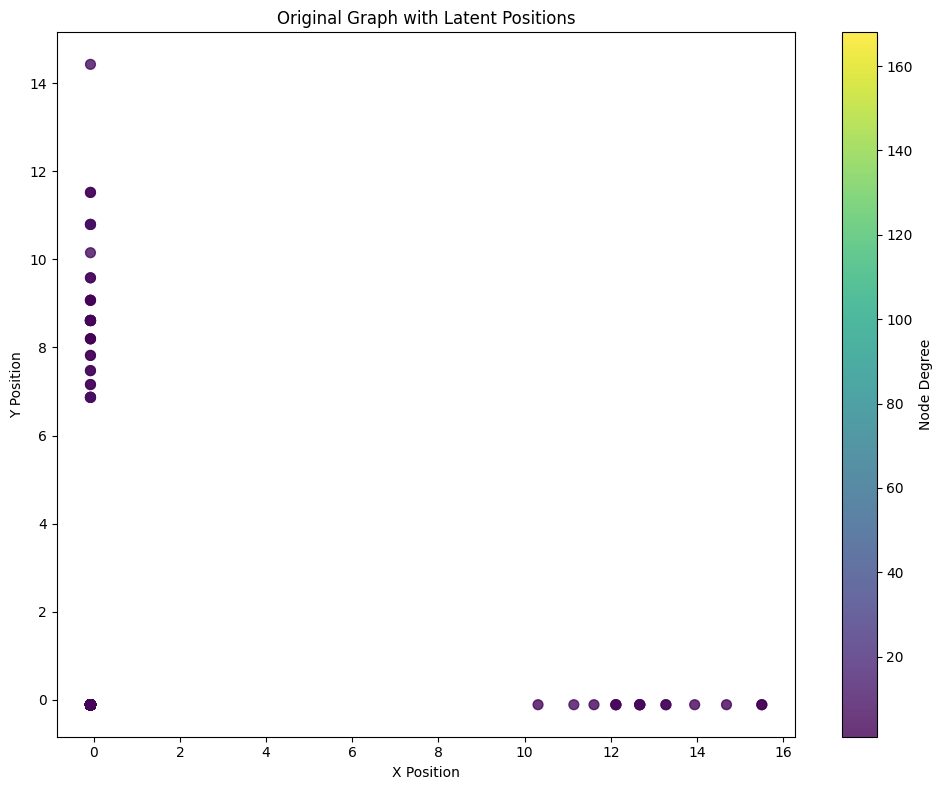

Generating initial edge embeddings...
Visualizing initial edge embeddings...


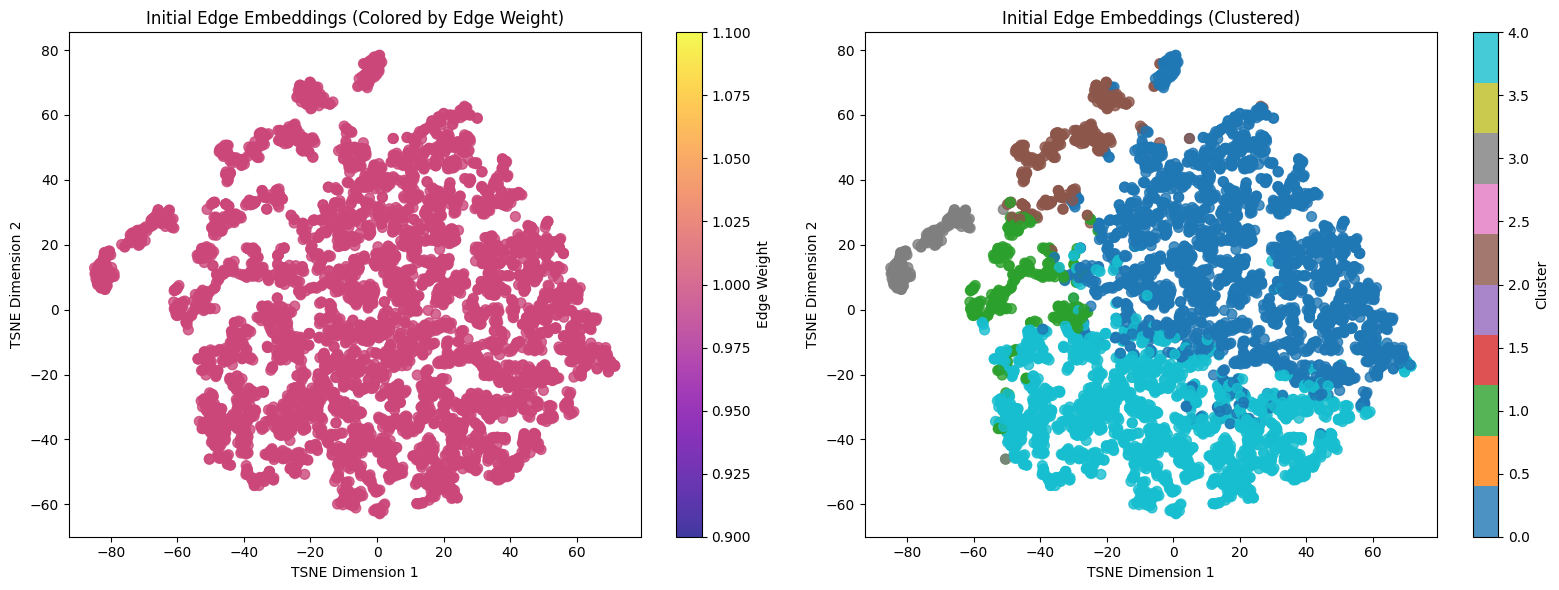


Training ReLearn model with KL annealing...
Epoch 10/500, Loss: 0.8661, Network Loss: 0.6931, Attr Loss: 0.9961, KL Loss: 7.1664 (weight: 0.0030), Temp: 0.9730
Epoch 20/500, Loss: 0.8867, Network Loss: 0.6918, Attr Loss: 0.9918, KL Loss: 7.0862 (weight: 0.0063), Temp: 0.9430
Epoch 30/500, Loss: 0.9076, Network Loss: 0.6875, Attr Loss: 0.9887, KL Loss: 7.1928 (weight: 0.0097), Temp: 0.9130
Epoch 40/500, Loss: 0.9300, Network Loss: 0.6798, Attr Loss: 0.9883, KL Loss: 7.3758 (weight: 0.0130), Temp: 0.8830
Epoch 50/500, Loss: 0.9482, Network Loss: 0.6618, Attr Loss: 0.9866, KL Loss: 7.5928 (weight: 0.0163), Temp: 0.8530
Epoch 60/500, Loss: 0.9644, Network Loss: 0.6430, Attr Loss: 0.9846, KL Loss: 7.6556 (weight: 0.0197), Temp: 0.8230
Epoch 70/500, Loss: 0.9913, Network Loss: 0.6370, Attr Loss: 0.9894, KL Loss: 7.7431 (weight: 0.0230), Temp: 0.7930
Epoch 80/500, Loss: 1.0029, Network Loss: 0.5907, Attr Loss: 0.9867, KL Loss: 8.1324 (weight: 0.0263), Temp: 0.7630
Epoch 90/500, Loss: 0.9940,

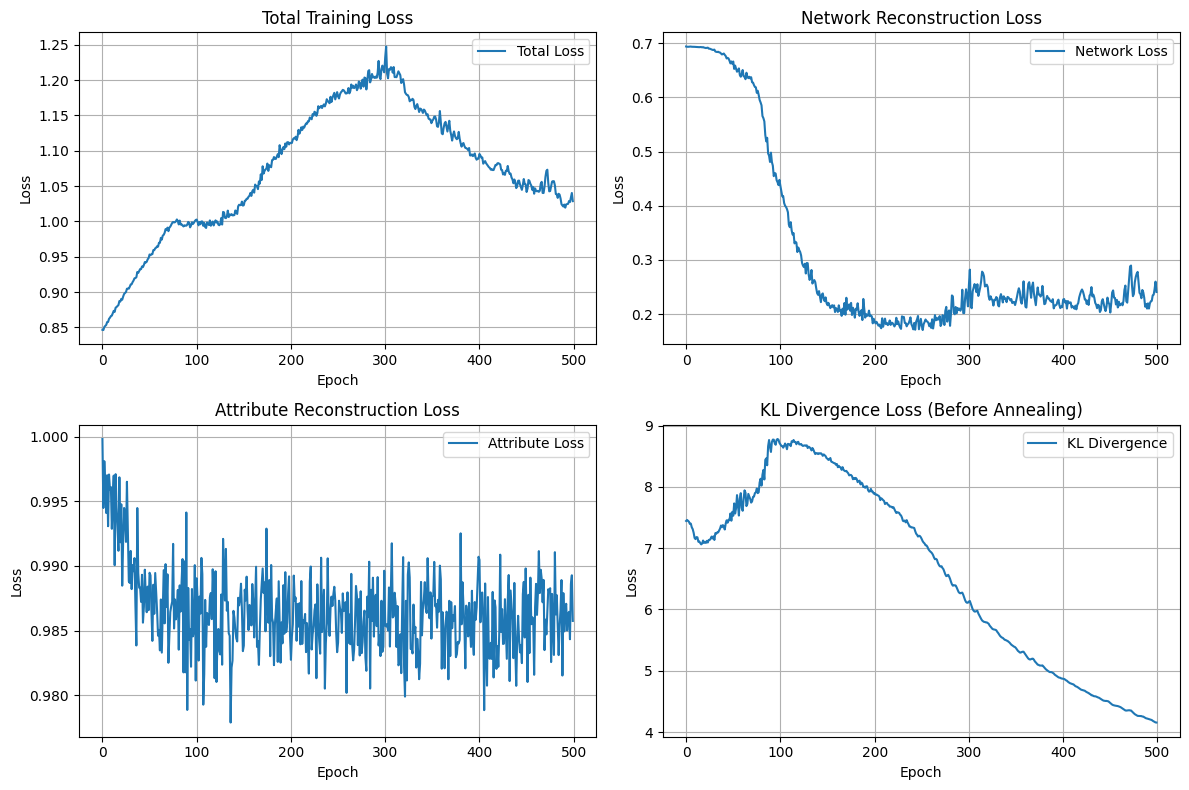


Visualizing learned edge embeddings...


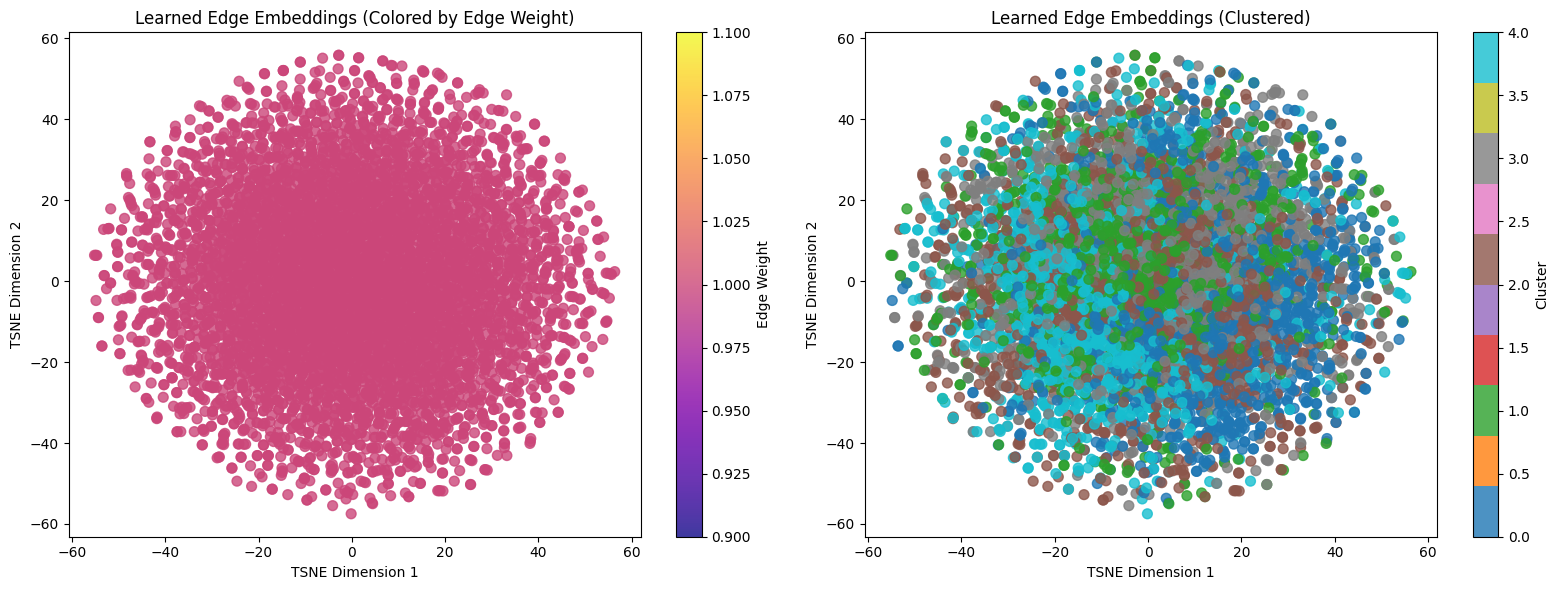


Evaluating link prediction...
Link prediction accuracy: 0.6700
Pipeline completed in 652.08 seconds

Visualizing training loss components...


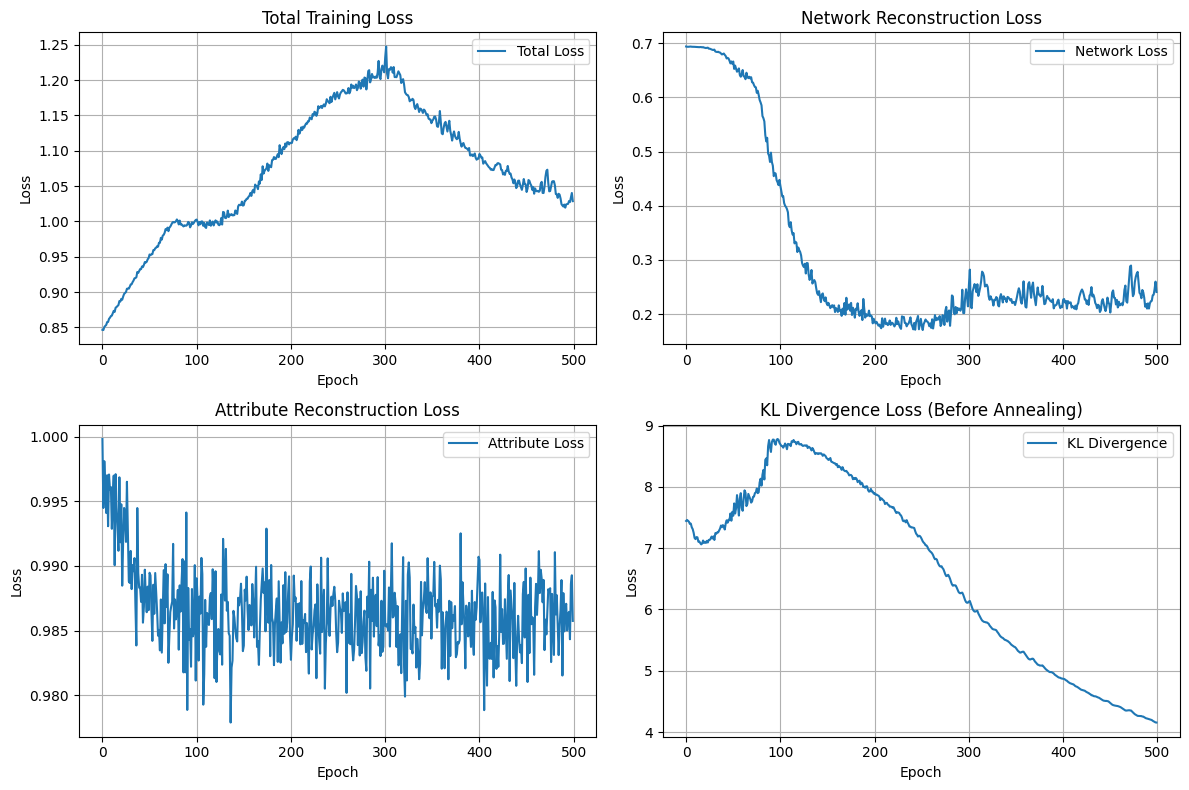


Visualizing learned node embeddings...
Using TSNE with perplexity=30 for 2708 samples


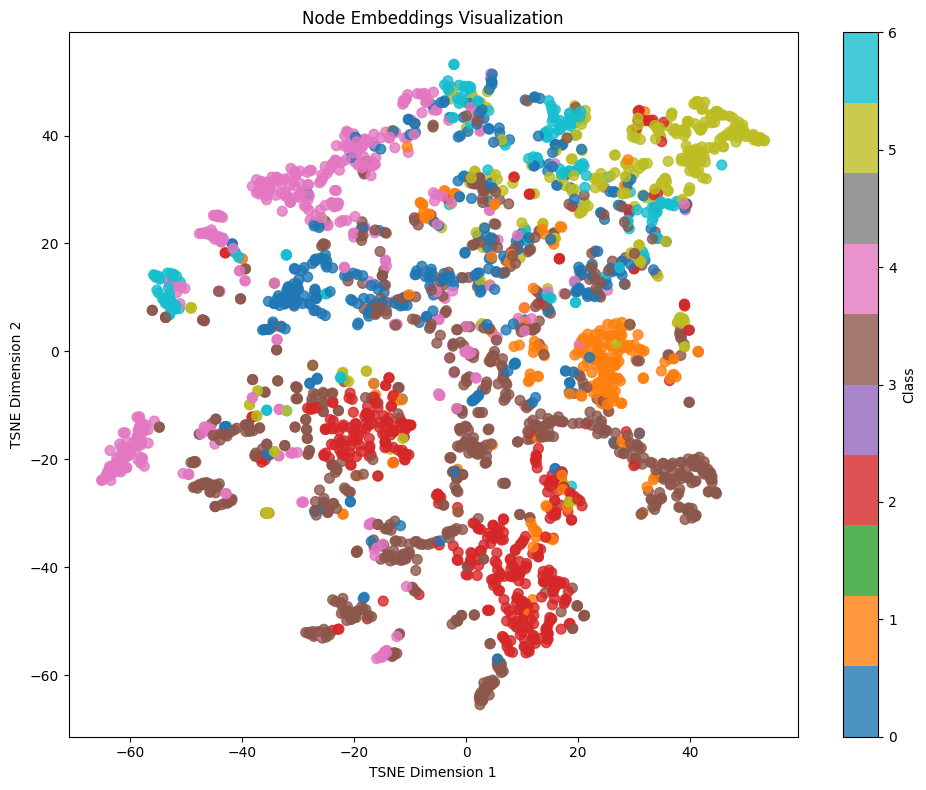


Evaluating link prediction performance...
Epoch 10/50, Loss: 1.3321, Network Loss: 0.1917, Attr Loss: 0.9872, KL Loss: 4.1260 (weight: 0.1800), Temp: 0.8380
Epoch 20/50, Loss: 2.1333, Network Loss: 0.1932, Attr Loss: 0.9890, KL Loss: 4.0583 (weight: 0.3800), Temp: 0.6580
Epoch 30/50, Loss: 2.8972, Network Loss: 0.1990, Attr Loss: 0.9797, KL Loss: 3.9791 (weight: 0.5800), Temp: 0.4780
Epoch 40/50, Loss: 3.6331, Network Loss: 0.2059, Attr Loss: 0.9919, KL Loss: 3.8900 (weight: 0.7800), Temp: 0.2980
Epoch 50/50, Loss: 4.3441, Network Loss: 0.2368, Attr Loss: 0.9849, KL Loss: 3.8094 (weight: 0.9800), Temp: 0.1180
Link prediction accuracy: 0.8090
Link prediction AUC: 0.8456

Test completed successfully!


In [8]:
# Initialize ReLearn model with scalable architecture
print("\nInitializing ReLearn model...")
input_dim = latent_positions.shape[1]

# Create model instance with flexible architecture
model = ReLearnModel(
    input_dim=input_dim,
    gcn_hidden_dims=gcn_hidden_dims,
    edge_mlp_hidden_dims=edge_mlp_hidden_dims,
    decoder_hidden_dims=decoder_hidden_dims,
    z_dim=z_dim,
    num_mixtures=num_mixtures,
    dropout=dropout
)

# Run complete pipeline with KL annealing
print("\nRunning ReLearn pipeline with KL annealing...")
start_time = time.time()
trained_model, loss_data, clusters = run_relearn_pipeline(
    graph=graph,
    latent_positions=latent_positions,
    gcn_hidden_dims=gcn_hidden_dims,
    edge_mlp_hidden_dims=edge_mlp_hidden_dims,
    decoder_hidden_dims=decoder_hidden_dims,
    z_dim=z_dim,
    num_mixtures=num_mixtures,
    num_epochs=num_epochs,
    kl_annealing=True,             # Enable KL annealing
    annealing_epochs=num_epochs*0.6,           # Duration of annealing (epochs)
    kl_start=0.0,                  # Starting KL weight
    kl_end=0.1,                    # Final KL weight
    temperature_start=1.0,         # Starting temperature for Gumbel-Softmax
    temperature_end=0.1,           # Final temperature for Gumbel-Softmax
    lambda1=0.5,                   # Network loss weight
    lambda2=0.5,                   # Attribute loss weight
    dropout=dropout,
    latent_viz=True
)
elapsed_time = time.time() - start_time
print(f"Pipeline completed in {elapsed_time:.2f} seconds")

# Visualize training losses
print("\nVisualizing training loss components...")
visualize_training_losses(loss_data)

# Visualize node embeddings
print("\nVisualizing learned node embeddings...")
visualize_node_embeddings(trained_model, graph, latent_positions, labels=sub_labels)

# Evaluate link prediction performance
print("\nEvaluating link prediction performance...")
accuracy, auc = evaluate_link_prediction(trained_model, graph, latent_positions)
print(f"Link prediction accuracy: {accuracy:.4f}")
print(f"Link prediction AUC: {auc:.4f}")
print("\nTest completed successfully!")

### DBLP dataset


=== DBLP Dataset Analysis ===
DBLP Dataset Statistics:
Number of nodes: 17716
Number of edges: 52867
Number of features: 1639
Number of classes: 4
Average degree: 5.97
Is connected: False
Largest component size: 16191 nodes

Class distribution:
  Class 0: 7920 nodes (44.71%)
  Class 1: 5645 nodes (31.86%)
  Class 2: 1982 nodes (11.19%)
  Class 3: 2169 nodes (12.24%)
Loading DBLP dataset...
Getting subset of 2000 nodes...
Subset statistics:
  Nodes: 2000
  Edges: 630
  Features: 1639
  Classes: 4
Creating and training ReLearn model...
Visualizing original graph...


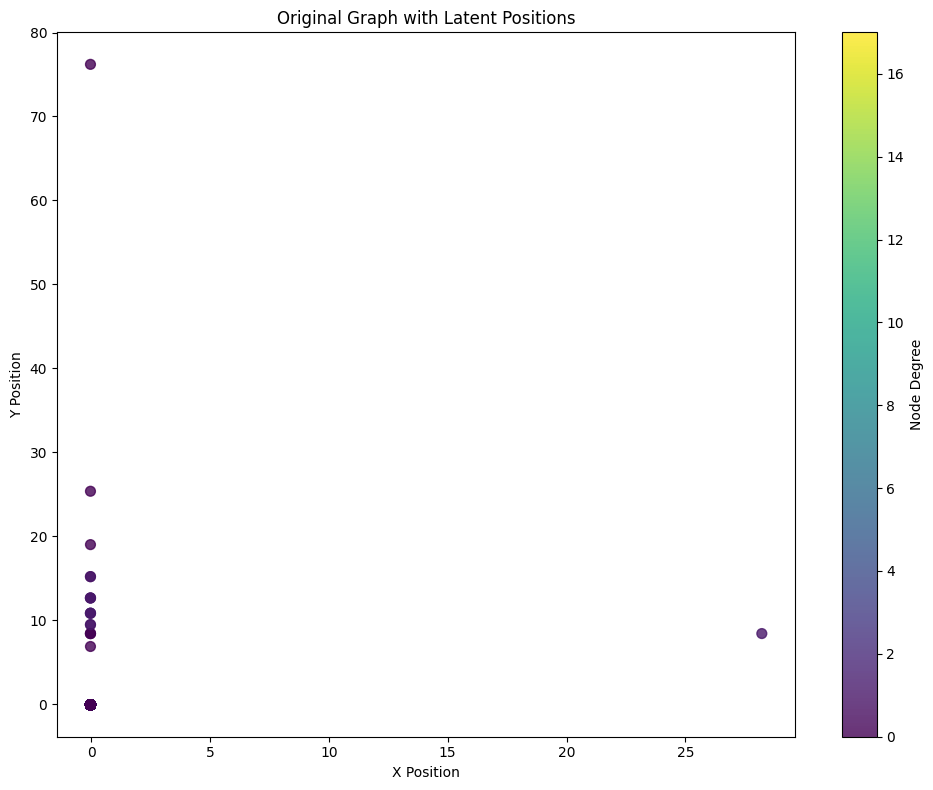

Generating initial edge embeddings...
Visualizing initial edge embeddings...


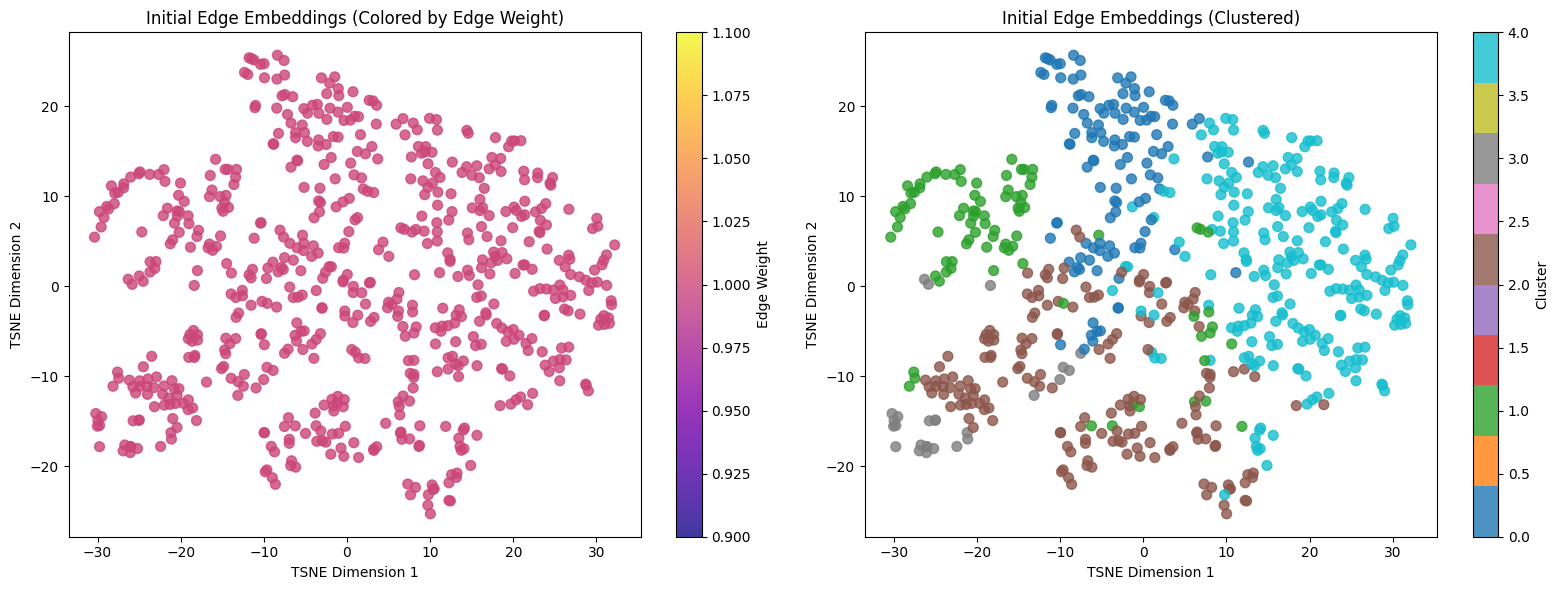


Training ReLearn model with KL annealing...
Epoch 10/500, Loss: 0.8600, Network Loss: 0.6931, Attr Loss: 0.9866, KL Loss: 6.7115 (weight: 0.0030), Temp: 0.9730
Epoch 20/500, Loss: 0.8923, Network Loss: 0.6931, Attr Loss: 1.0088, KL Loss: 6.5348 (weight: 0.0063), Temp: 0.9430
Epoch 30/500, Loss: 0.9091, Network Loss: 0.6906, Attr Loss: 1.0010, KL Loss: 6.5462 (weight: 0.0097), Temp: 0.9130
Epoch 40/500, Loss: 0.9168, Network Loss: 0.6801, Attr Loss: 0.9817, KL Loss: 6.6091 (weight: 0.0130), Temp: 0.8830
Epoch 50/500, Loss: 0.9061, Network Loss: 0.5847, Attr Loss: 0.9921, KL Loss: 7.2023 (weight: 0.0163), Temp: 0.8530
Epoch 60/500, Loss: 0.8545, Network Loss: 0.4098, Attr Loss: 0.9876, KL Loss: 7.9218 (weight: 0.0197), Temp: 0.8230
Epoch 70/500, Loss: 0.8763, Network Loss: 0.3856, Attr Loss: 1.0039, KL Loss: 7.8961 (weight: 0.0230), Temp: 0.7930
Epoch 80/500, Loss: 0.8308, Network Loss: 0.2474, Attr Loss: 0.9796, KL Loss: 8.2522 (weight: 0.0263), Temp: 0.7630
Epoch 90/500, Loss: 0.8240,

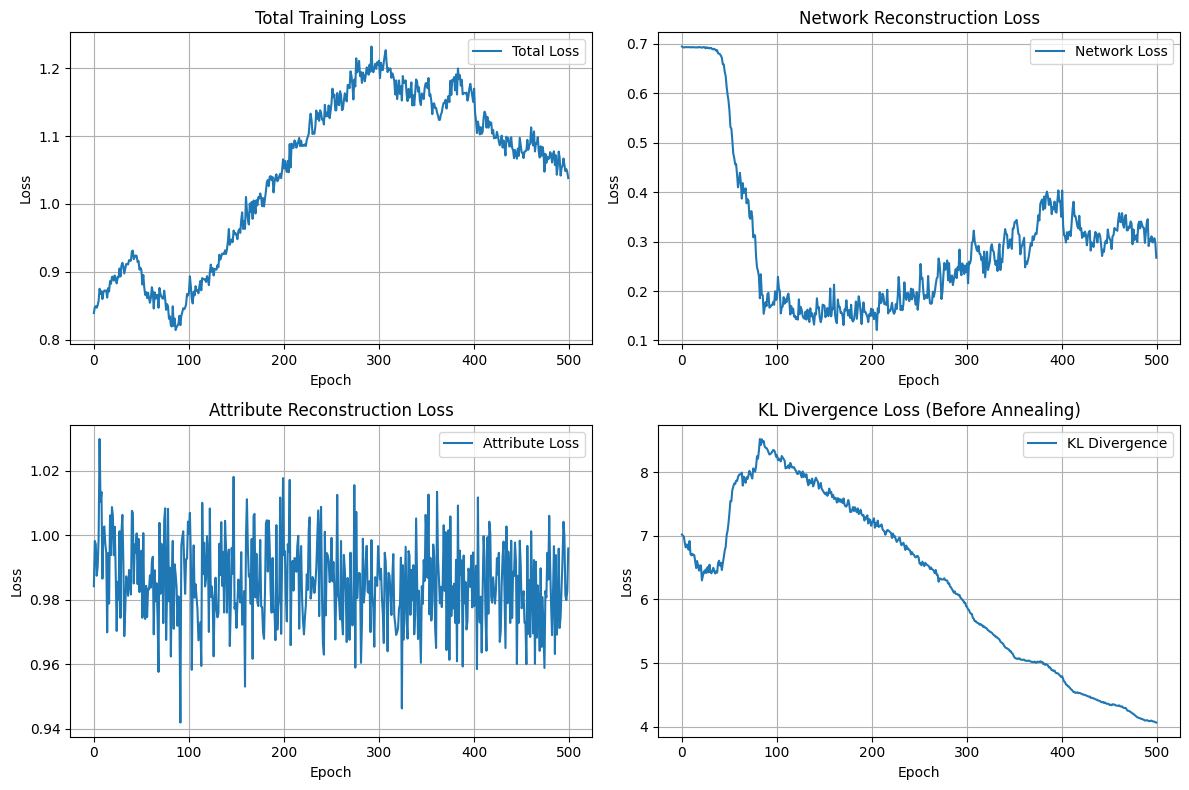


Visualizing learned edge embeddings...


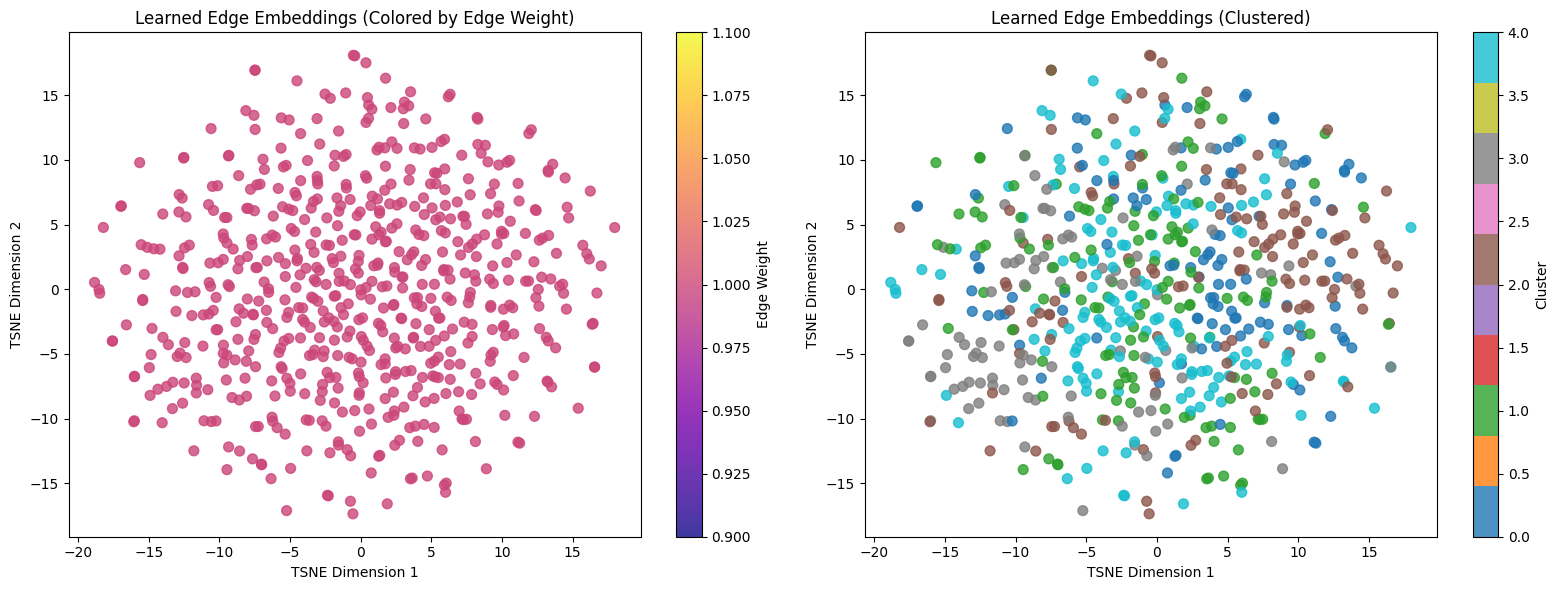


Evaluating link prediction...
Link prediction accuracy: 0.7400

Evaluating link prediction...
Epoch 10/50, Loss: 1.3795, Network Loss: 0.3141, Attr Loss: 0.9977, KL Loss: 4.0201 (weight: 0.1800), Temp: 0.8380
Epoch 20/50, Loss: 2.1467, Network Loss: 0.2738, Attr Loss: 1.0027, KL Loss: 3.9697 (weight: 0.3800), Temp: 0.6580
Epoch 30/50, Loss: 2.8944, Network Loss: 0.3323, Attr Loss: 0.9901, KL Loss: 3.8503 (weight: 0.5800), Temp: 0.4780
Epoch 40/50, Loss: 3.6244, Network Loss: 0.4557, Attr Loss: 0.9851, KL Loss: 3.7231 (weight: 0.7800), Temp: 0.2980
Epoch 50/50, Loss: 4.3162, Network Loss: 0.4094, Attr Loss: 0.9972, KL Loss: 3.6866 (weight: 0.9800), Temp: 0.1180
Link prediction accuracy: 0.6349
Link prediction AUC: 0.6580

Visualizing node embeddings...
Using TSNE with perplexity=30 for 2000 samples


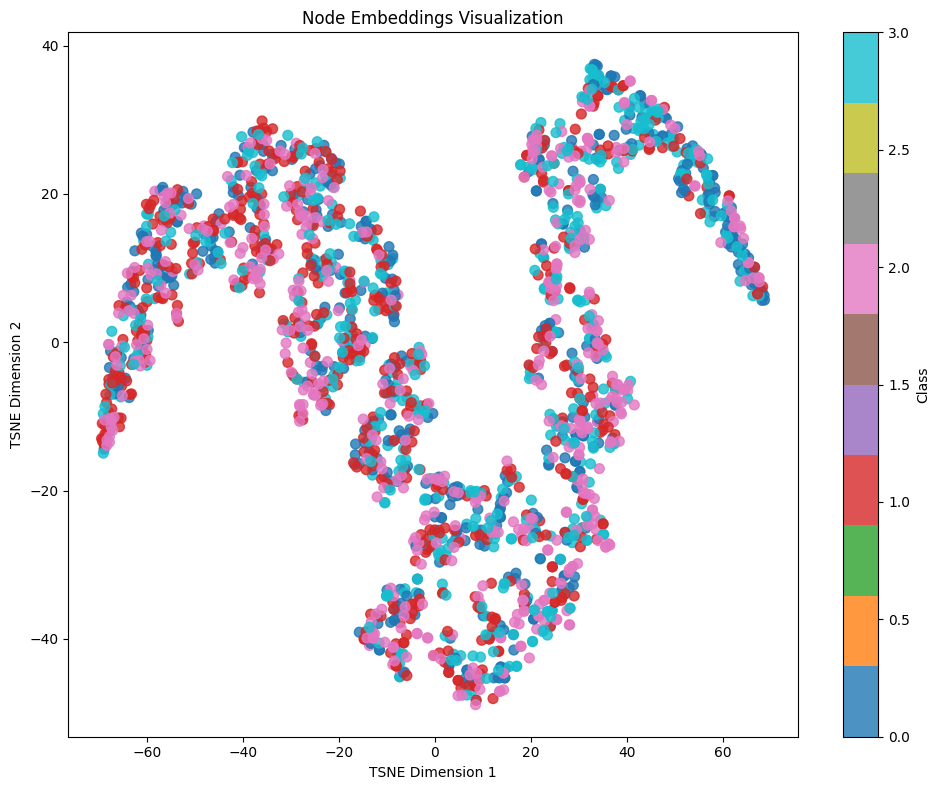

In [9]:
from relearn.dblp_eval import *

# Analyze the DBLP dataset
print("\n=== DBLP Dataset Analysis ===")
analyze_dblp_dataset()

print("Loading DBLP dataset...")
G, latent_positions, labels = load_dblp_dataset()

num_nodes = 2000
    
print(f"Getting subset of {num_nodes} nodes...")
subgraph, sub_latent_positions, sub_labels = get_subset_graph(
    G, latent_positions, labels, num_nodes=num_nodes, class_balanced=True
)
    
    # Print subset statistics
print(f"Subset statistics:")
print(f"  Nodes: {subgraph.number_of_nodes()}")
print(f"  Edges: {subgraph.number_of_edges()}")
print(f"  Features: {sub_latent_positions.shape[1]}")
if sub_labels is not None:
    print(f"  Classes: {len(np.unique(sub_labels))}")
    
print("Creating and training ReLearn model...")

edge_count = subgraph.number_of_edges()
latent_viz = edge_count >= 10  # Only visualize if we have enough edges
    
    # Train the model
model, loss_data, clusters = run_relearn_pipeline(
    subgraph,
    sub_latent_positions,
    gcn_hidden_dims=gcn_hidden_dims,
    edge_mlp_hidden_dims=edge_mlp_hidden_dims,
    decoder_hidden_dims=decoder_hidden_dims,
    z_dim=z_dim,
    num_mixtures=num_mixtures,
    num_epochs=num_epochs,
    kl_annealing=True,
    annealing_epochs=num_epochs*0.6,
    kl_start=0.0,
    kl_end=0.1,
    temperature_start=1.0,
    temperature_end=0.1,
    lambda1=0.5,
    lambda2=0.5,
    lr=0.001,
    dropout=0.1,
    latent_viz=latent_viz
)
    
# Evaluate link prediction
print("\nEvaluating link prediction...")
accuracy, auc = evaluate_link_prediction(model, subgraph, sub_latent_positions)
print(f"Link prediction accuracy: {accuracy:.4f}")
print(f"Link prediction AUC: {auc:.4f}")
    
# Visualize node embeddings with class labels if we have enough nodes
if subgraph.number_of_nodes() >= 10:
    print("\nVisualizing node embeddings...")
    visualize_node_embeddings(model, subgraph, sub_latent_positions, sub_labels)